## AdaBoost - Adaptive Boosting
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

In [164]:
from sklearn.datasets import load_iris
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [165]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=iris.target
df.drop(columns=['petal length (cm)','petal width (cm)'],axis=1,inplace=True)

In [166]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [167]:
df_sampled = df.groupby('species', group_keys=False).apply(lambda x: x.sample(10, random_state=42))
print(df_sampled['species'].value_counts())

species
0    10
1    10
2    10
Name: count, dtype: int64


In [168]:
df_sampled

,sepal length (cm),sepal width (cm),species
13,4.3,3.0,0
39,5.1,3.4,0
30,4.8,3.1,0
45,4.8,3.0,0
17,5.1,3.5,0
48,5.3,3.7,0
26,5.0,3.4,0
25,5.0,3.0,0
32,5.2,4.1,0
19,5.1,3.8,0


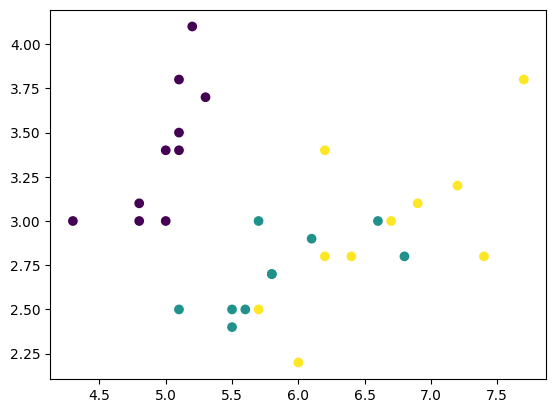

In [169]:
plt.scatter(df_sampled['sepal length (cm)'],df_sampled['sepal width (cm)'],c=df_sampled['species'])
plt.show()

In [170]:
df_sampled.shape

(30, 3)

## 1.Initialize sample weights = 1/N

In [171]:
w=1/30
w

0.03333333333333333

In [172]:
df_sampled['sample weights']=w
df_sampled

,sepal length (cm),sepal width (cm),species,sample weights
13,4.3,3.0,0,0.033333
39,5.1,3.4,0,0.033333
30,4.8,3.1,0,0.033333
45,4.8,3.0,0,0.033333
17,5.1,3.5,0,0.033333
48,5.3,3.7,0,0.033333
26,5.0,3.4,0,0.033333
25,5.0,3.0,0,0.033333
32,5.2,4.1,0,0.033333
19,5.1,3.8,0,0.033333


In [173]:
(0.033333)*30

0.99999

## 2.Train first stump

In [174]:
from sklearn.tree import DecisionTreeClassifier
stump1=DecisionTreeClassifier(max_depth=1)
stump1.fit(df_sampled[['sepal length (cm)','sepal width (cm)']],df_sampled['species'],sample_weight=df_sampled['sample weights'])

DecisionTreeClassifier(max_depth=1)

In [175]:
stump1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

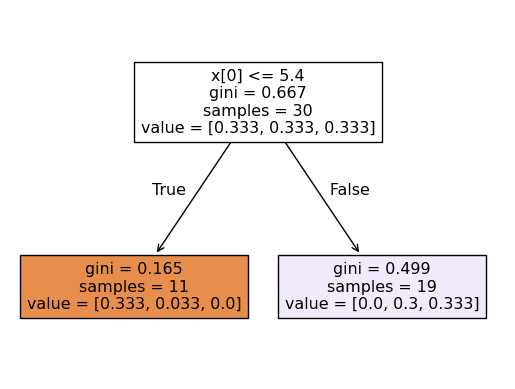

In [176]:
from sklearn.tree import plot_tree
plot_tree(stump1,filled=True)
plt.show()

In [177]:
y_pred = stump1.predict(df_sampled[['sepal length (cm)', 'sepal width (cm)']])
y_true = df_sampled['species']
misclassified_mask = (y_pred != y_true)

In [178]:
misclassified_mask

,species
13,False
39,False
30,False
45,False
17,False
48,False
26,False
25,False
32,False
19,False


In [179]:
df_misclassified = df_sampled[misclassified_mask].copy()
print(df_misclassified[['sepal length (cm)', 'sepal width (cm)', 'species', 'sample weights']])

    sepal length (cm)  sepal width (cm)  species  sample weights
63                6.1               2.9        1        0.033333
89                5.5               2.5        1        0.033333
80                5.5               2.4        1        0.033333
95                5.7               3.0        1        0.033333
67                5.8               2.7        1        0.033333
98                5.1               2.5        1        0.033333
76                6.8               2.8        1        0.033333
75                6.6               3.0        1        0.033333
82                5.8               2.7        1        0.033333
69                5.6               2.5        1        0.033333


In [180]:
(0.033333)*10

0.33333

## 3.Compute Amount Of Say for stump 1
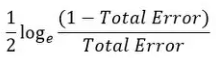

In [181]:
stmup_1_acc=1-0.33333
stump_1_error=1-stmup_1_acc
stmup_1_acc,stump_1_error

(0.66667, 0.33333)

In [182]:
numerator=1-stump_1_error

In [183]:
stump_1_say=(1/2)*np.log(numerator/stump_1_error)

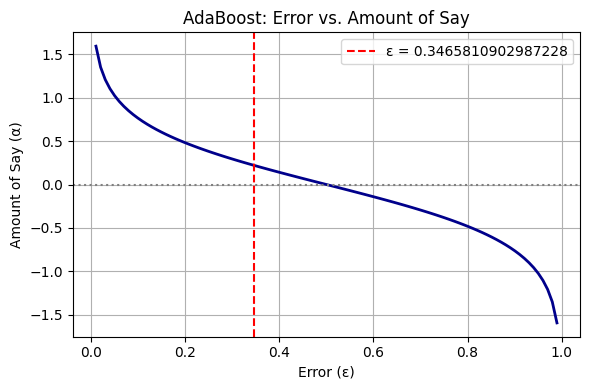

In [184]:
errors = np.linspace(0.01, 0.99, 100)
alphas = 0.3465810902987228 * np.log((1 - errors) / errors)

plt.figure(figsize=(6, 4))
plt.plot(errors, alphas, color='darkblue', linewidth=2)
plt.axvline(0.3465810902987228, color='red', linestyle='--', label='ε = 0.3465810902987228')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Error (ε)')
plt.ylabel('Amount of Say (α)')
plt.title('AdaBoost: Error vs. Amount of Say')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.Increase weight for misclassified samples.
To increase weight = sample weight * e^amount of say

In [185]:
new_w_misclassified=w*np.exp(stump_1_say)
new_w_misclassified

np.float64(0.047140805634703485)

## 5.Decrease weight for correctly classified samples
To decrease weight = sample weight*e^-amount of say

In [186]:
new_w_classified=w*np.exp(-stump_1_say)
new_w_classified

np.float64(0.023570049263077257)

## 6.Normalize the new weights equal to nearly 1

In [187]:
df_sampled['new weights'] = np.where(
    misclassified_mask,
    new_w_misclassified,
    new_w_classified
)
df_sampled['new weights'] = df_sampled['new weights'] / df_sampled['new weights'].sum()

In [188]:
df_sampled

,sepal length (cm),sepal width (cm),species,sample weights,new weights
13,4.3,3.0,0,0.033333,0.025
39,5.1,3.4,0,0.033333,0.025
30,4.8,3.1,0,0.033333,0.025
45,4.8,3.0,0,0.033333,0.025
17,5.1,3.5,0,0.033333,0.025
48,5.3,3.7,0,0.033333,0.025
26,5.0,3.4,0,0.033333,0.025
25,5.0,3.0,0,0.033333,0.025
32,5.2,4.1,0,0.033333,0.025
19,5.1,3.8,0,0.033333,0.025


In [189]:
df_sampled['new weights'].sum()

np.float64(0.9999999999999998)

## 7.Create a intervals

In [190]:
df_sampled['interval_start'] = df_sampled['new weights'].cumsum() - df_sampled['new weights']
df_sampled['interval_end'] = df_sampled['new weights'].cumsum()
df_sampled['interval'] = df_sampled.apply(
    lambda row: f"{row['interval_start']:.6f} - {row['interval_end']:.6f}",
    axis=1
)
print(df_sampled[['species', 'new weights', 'interval']])

     species  new weights             interval
13         0        0.025  0.000000 - 0.025000
39         0        0.025  0.025000 - 0.050000
30         0        0.025  0.050000 - 0.074999
45         0        0.025  0.074999 - 0.099999
17         0        0.025  0.099999 - 0.124999
48         0        0.025  0.124999 - 0.149999
26         0        0.025  0.149999 - 0.174999
25         0        0.025  0.174999 - 0.199998
32         0        0.025  0.199998 - 0.224998
19         0        0.025  0.224998 - 0.249998
63         1        0.050  0.249998 - 0.299998
89         1        0.050  0.299998 - 0.349999
80         1        0.050  0.349999 - 0.399999
95         1        0.050  0.399999 - 0.450000
67         1        0.050  0.450000 - 0.500000
98         1        0.050  0.500000 - 0.550000
76         1        0.050  0.550000 - 0.600001
75         1        0.050  0.600001 - 0.650001
82         1        0.050  0.650001 - 0.700002
69         1        0.050  0.700002 - 0.750002
113        2 

## 8.Train next stump with more misclassified samples

In [191]:
df_round2 = df_sampled.sample(n=30, weights='new weights', random_state=42)
stump2 = DecisionTreeClassifier(max_depth=1)
stump2.fit(
    df_round2[['sepal length (cm)', 'sepal width (cm)']],
    df_round2['species'],
    sample_weight=df_round2['new weights']
)

DecisionTreeClassifier(max_depth=1)

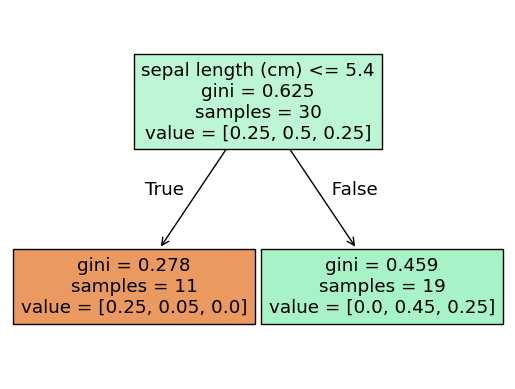

In [192]:
plot_tree(stump2, feature_names=['sepal length (cm)', 'sepal width (cm)'],filled=True)
plt.show()

In [193]:
y_pred2 = stump2.predict(df_sampled[['sepal length (cm)', 'sepal width (cm)']])
prev_misclassified = df_sampled[misclassified_mask]
prev_misclassified['stump2_pred'] = y_pred2[misclassified_mask.values]
prev_misclassified['corrected'] = (prev_misclassified['species'] == prev_misclassified['stump2_pred'])
print(prev_misclassified[['species', 'stump2_pred', 'corrected']])

    species  stump2_pred  corrected
63        1            1       True
89        1            1       True
80        1            1       True
95        1            1       True
67        1            1       True
98        1            0      False
76        1            1       True
75        1            1       True
82        1            1       True
69        1            1       True


## As you can see the misclassified samples are correctly classified by stump 2 by giving more weightage.These way AdaBoostClassifier() works.



---

